In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## 平均一天喝幾杯含糖飲料以上未來易得糖尿病?

In [20]:
data=pd.read_csv('LogR_data.csv')

In [21]:
data

,Name,Amount,Result
0,Jack,0,0
1,Amy,1,1
2,John,3,1
3,Anna,2,1
4,Nick,1,0
5,Jocelyn,1,0
6,Bob,0,0
7,Candy,0,1
8,Lily,1,0
9,Grace,0,0


In [22]:
X=data['Amount'].values
y=data['Result'].values

In [23]:
X

array([0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3])

In [24]:
X.shape

(20,)

In [25]:
X=X.reshape(-1,1)

In [26]:
X.shape

(20, 1)

## $$logit(Odds)=\ln (\frac{p}{1-p}) = w_0+w_1X$$

In [27]:
model=linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [28]:
print('coef', model.coef_)
print('intercept',model.intercept_)

coef [[0.83465026]]
intercept [-1.30182658]


In [29]:
w1=float(model.coef_)
w0=float(model.intercept_)

C:\Users\User\AppData\Local\Temp\ipykernel_26340\1547203764.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w1=float(model.coef_)
C:\Users\User\AppData\Local\Temp\ipykernel_26340\1547203764.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w0=float(model.intercept_)


In [30]:
def sigmoid(x,wo,w1):
    ln_odds=wo+w1*x
    return 1/(1+np.exp(-ln_odds))

## $$S(X)=\frac{1}{1+e^{-X}}$$

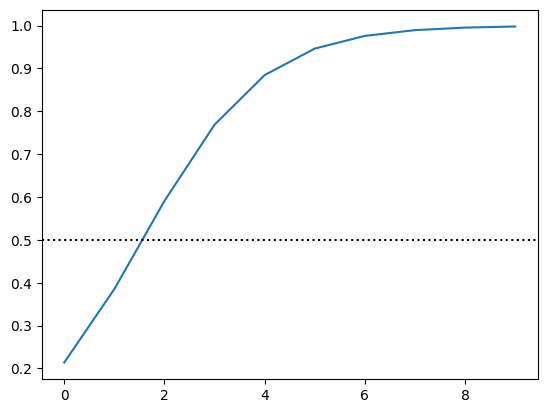

In [31]:
x=np.arange(0,10,1)
s_x=sigmoid(x,w0,w1)
plt.plot(x,s_x)
plt.axhline(y=0.5, ls='dotted', color='k')

In [32]:
model.predict([[0],[1],[2],[3]])

array([0, 0, 1, 1])

In [33]:
X

array([[0],
       [1],
       [3],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [3],
       [3],
       [2],
       [2],
       [0],
       [2],
       [3],
       [2],
       [3]])

In [34]:
model.predict_proba(X)

array([[0.78614223, 0.21385777],
       [0.61471521, 0.38528479],
       [0.23109755, 0.76890245],
       [0.40915155, 0.59084845],
       [0.61471521, 0.38528479],
       [0.61471521, 0.38528479],
       [0.78614223, 0.21385777],
       [0.78614223, 0.21385777],
       [0.61471521, 0.38528479],
       [0.78614223, 0.21385777],
       [0.40915155, 0.59084845],
       [0.23109755, 0.76890245],
       [0.23109755, 0.76890245],
       [0.40915155, 0.59084845],
       [0.40915155, 0.59084845],
       [0.78614223, 0.21385777],
       [0.40915155, 0.59084845],
       [0.23109755, 0.76890245],
       [0.40915155, 0.59084845],
       [0.23109755, 0.76890245]])

In [35]:
model.score(X,y)

0.75

# 多元分類

In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [37]:
iris=datasets.load_iris()

In [38]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
X=iris.data
y=iris.target

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [42]:
model=linear_model.LogisticRegression()

In [43]:
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
model.predict(X_test)

array([2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1,
       1])

In [45]:
model.predict_proba(X_test)

array([[8.09591397e-05, 9.04287347e-02, 9.09490306e-01],
       [1.99025360e-03, 5.85769580e-01, 4.12240166e-01],
       [7.12880598e-02, 9.22438575e-01, 6.27336510e-03],
       [9.67239688e-01, 3.27601649e-02, 1.47053279e-07],
       [9.71764188e-01, 2.82357207e-02, 9.13787677e-08],
       [9.75303441e-01, 2.46964004e-02, 1.58511558e-07],
       [2.90084715e-02, 9.16674189e-01, 5.43173399e-02],
       [9.60604369e-01, 3.93954951e-02, 1.36142259e-07],
       [2.16924858e-07, 2.53460676e-03, 9.97465176e-01],
       [2.25880358e-04, 8.14858022e-02, 9.18288317e-01],
       [9.70780364e-01, 2.92195318e-02, 1.04284438e-07],
       [8.55920579e-02, 9.08969447e-01, 5.43849498e-03],
       [1.04602532e-06, 9.20304058e-03, 9.90795913e-01],
       [9.51156898e-01, 4.88427040e-02, 3.97631889e-07],
       [9.81810160e-01, 1.81897944e-02, 4.55942925e-08],
       [3.56482623e-06, 6.85045295e-03, 9.93145982e-01],
       [3.90493355e-02, 9.07778349e-01, 5.31723159e-02],
       [9.83098770e-01, 1.69011

In [46]:
model.score(X_train,y_train)

0.9809523809523809

In [47]:
model.score(X_test,y_test)

0.9555555555555556